In [40]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import random, numpy, math
import numpy as np
%matplotlib inline

with open("data1.txt", "r") as f:
    data1 = [np.array(map(int, filter(None, point.split(" ")))) 
            for point in f.read().split("\n") if point]

with open("data2.txt", "r") as f:
    data2 = [np.array(map(int, filter(None, point.split(" ")))) 
            for point in f.read().split("\n") if point]

In [41]:
sigma = 2
def guassian_kernel_function(X, Z):
    num = np.sum(np.power(X-Z, 2))
    den = (2 * sigma**2)
    return math.exp( -num / den )

def quad_kernel_function(X, Z):
    return (1 + X.dot(Z))**2

class KernelPerceptron(object):
    def __init__(self, kernel_function, train_data):
        self.kernel_function = kernel_function
        self.data = train_data
        self.train()
        
    def classify(self, X):
        sumi = 0
        for j in range(len(self.data)):
            Xj = self.data[j][:-1]
            Yj = self.data[j][-1]
            sumi += self.alpha[j] * Yj * self.kernel_function(Xj, X)
        return np.sign(sumi)

    def train(self):
        self.alpha = np.zeros(len(self.data))
        while True:
            stop_kar_chutiya = True
            for i in range(len(self.data)):
                Xi = self.data[i][:-1]
                Yi = self.data[i][-1]            

                if self.classify(Xi) != Yi:
                    self.alpha[i] += 1
                    stop_kar_chutiya = False

            if stop_kar_chutiya:
                break
    
    def plot_boundary(self):
        # Plot the points.
        X1 = []
        X2 = []
        Ys = []
        for i in range(len(self.data)):
            X = self.data[i][:-1]
            Y = self.data[i][-1]
            X1.append(X[0])
            X2.append(X[1])
            Ys.append(Y)
        plt.scatter(X1, X2, c=Ys)
        
        # Plot the decision boundary.
        X = np.arange(0, 11, 0.1)
        Y = np.arange(0, 11, 0.1)
        X, Y = np.meshgrid(X, Y)
        Z = np.zeros(X.shape)
        for i in range(110):
            for j in range(110):
                point = np.array([X[i][j], Y[i][j]])
                Z[i][j] = self.classify(point)
        plt.contour(X, Y, Z, [0.0], colors='k', linewidths=1, origin='lower')
        plt.show()

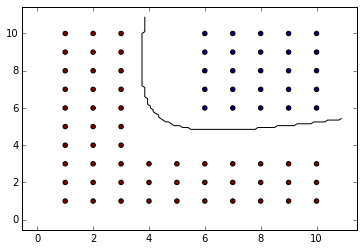

In [42]:
perceptron = KernelPerceptron(quad_kernel_function, data1)
perceptron.plot_boundary()

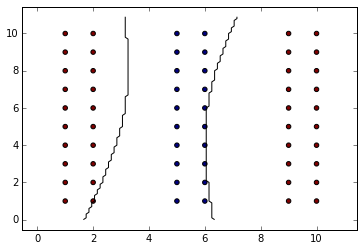

In [43]:
perceptron = KernelPerceptron(quad_kernel_function, data2)
perceptron.plot_boundary()

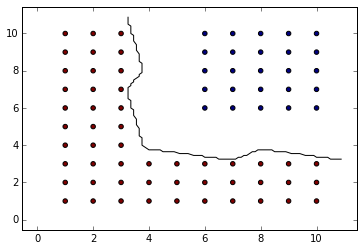

In [46]:
sigma = 0.1
perceptron = KernelPerceptron(guassian_kernel_function, data1)
perceptron.plot_boundary()

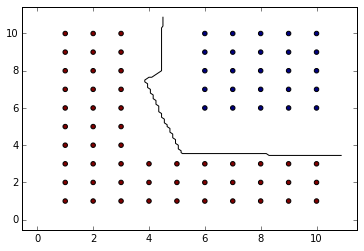

In [48]:
sigma = 0.5
perceptron = KernelPerceptron(guassian_kernel_function, data1)
perceptron.plot_boundary()

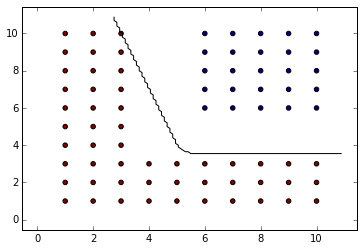

In [49]:
sigma = 1
perceptron = KernelPerceptron(guassian_kernel_function, data1)
perceptron.plot_boundary()

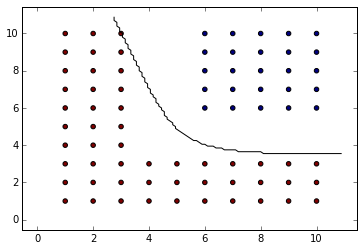

In [44]:
sigma = 2
perceptron = KernelPerceptron(guassian_kernel_function, data1)
perceptron.plot_boundary()

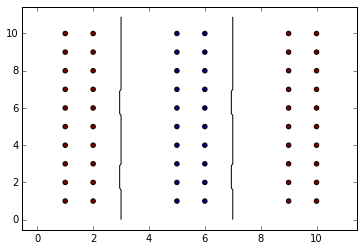

In [50]:
sigma = 0.1
perceptron = KernelPerceptron(guassian_kernel_function, data2)
perceptron.plot_boundary()

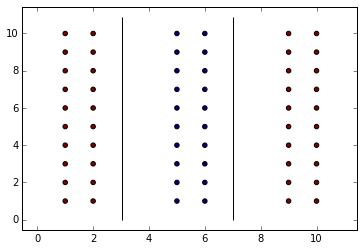

In [51]:
sigma = 0.5
perceptron = KernelPerceptron(guassian_kernel_function, data2)
perceptron.plot_boundary()

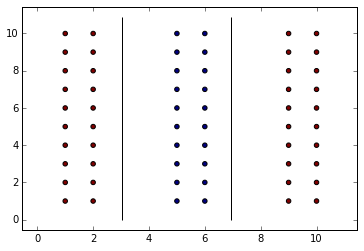

In [52]:
sigma = 1
perceptron = KernelPerceptron(guassian_kernel_function, data2)
perceptron.plot_boundary()

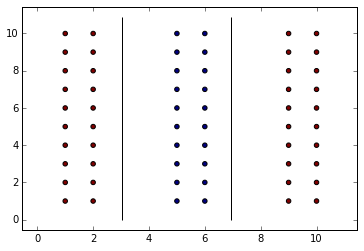

In [53]:
sigma = 2
perceptron = KernelPerceptron(guassian_kernel_function, data2)
perceptron.plot_boundary()